In [1]:
import pandas as pd
import numpy as np


## Data Sourcing


In [612]:
from data import Data
df = Data().get_match_table()

Index(['peak_id', 'host', 'summit_days', 'tot_days', 'camps', 'rope',
       'tot_members', 'tot_hired', 'no_hired', 'comrte', 'stdrte', 'primrte',
       'peak_height', 'season', 'sex_M', 'yob', 'status', 'leader', 'deputy',
       'bconly', 'nottobc', 'support', 'disabled', 'hired', 'sherpa',
       'tibetan', 'summit_success', 'solo', 'traverse', 'ski', 'parapente',
       'speed', 'route1', 'ascent1', 'o2_used', 'o2_none', 'o2_climb',
       'o2_descent', 'o2_sleep', 'o2_medical', 'age', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'height_m', 'country_host'],
      dtype='object')

In [601]:
df.head()

,peak_id,host,summit_days,tot_days,camps,rope,tot_members,tot_hired,no_hired,comrte,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,height_m,country_host
0,AMPG,Nepal,0,4,0,0,3,0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630,Nepal only
1,AMPG,Nepal,0,4,0,0,3,0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630,Nepal only
2,AMPG,Nepal,0,4,0,0,3,0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630,Nepal only
3,ANN3,Nepal,0,0,0,0,2,0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7555,Nepal only
4,ANN3,Nepal,0,0,0,0,2,0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7555,Nepal only


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16383 entries, 0 to 16382
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   peak_id            16383 non-null  object 
 1   host               16383 non-null  object 
 2   summit_days        16383 non-null  int64  
 3   tot_days           16383 non-null  int64  
 4   camps              16383 non-null  int64  
 5   rope               16383 non-null  int64  
 6   tot_members        16383 non-null  int64  
 7   tot_hired          16383 non-null  int64  
 8   no_hired           16383 non-null  bool   
 9   comrte             16383 non-null  bool   
 10  stdrte             16383 non-null  bool   
 11  primrte            16383 non-null  bool   
 12  peak_height        16383 non-null  int64  
 13  season             16383 non-null  object 
 14  sex_M              16383 non-null  float64
 15  yob                16383 non-null  float64
 16  status             163

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,summit_days,tot_days,camps,rope,tot_members,tot_hired,no_hired,comrte,stdrte,primrte,peak_height,sex_M,yob,leader,deputy,bconly,nottobc,support,disabled,hired,sherpa,tibetan,summit_success,solo,traverse,ski,parapente,speed,route1,ascent1,o2_used,o2_none,o2_climb,o2_descent,o2_sleep,o2_medical,age,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,height_m
summit_days,1.000000,0.894297,0.531802,0.152004,0.131001,0.242814,-0.159423,0.195498,0.524471,-0.016699,0.578413,0.048325,0.073058,-0.060738,0.031270,-0.168738,-0.109017,0.024771,0.000283,0.137134,0.170430,-0.061705,0.301564,-0.012460,-0.009516,-0.004090,-0.001669,-0.002548,0.308633,0.003704,0.577769,-0.557893,0.577878,0.045485,0.452264,0.004623,-0.097076,0.439011,0.504765,0.104235,0.265501,-0.289649,0.097750,0.518112,0.515902,0.521954,0.515902,-0.144851,0.270937,0.275535,0.173734,-0.526416,0.439011,-0.155207,-0.038947,-0.027336,0.578413
tot_days,0.894297,1.000000,0.491003,0.142333,0.190612,0.313537,-0.146936,0.199105,0.529860,0.036943,0.599190,0.044874,0.069654,-0.071863,0.041791,-0.096949,-0.114594,0.020934,0.003433,0.122785,0.161793,-0.067191,0.238522,-0.013423,-0.008598,-0.008792,-0.014043,-0.005664,0.273266,-0.008249,0.520442,-0.493140,0.519083,0.039686,0.421910,0.009846,-0.093893,0.358925,0.439153,0.141007,0.248644,-0.306803,0.072934,0.472416,0.443643,0.444444,0.443643,-0.144631,0.310593,0.309646,0.208115,-0.471208,0.358925,-0.212333,-0.034885,-0.024457,0.599190


In [53]:
df.to_csv("colab_data.csv")

# Data Preprocessing

In [7]:
col_num = []
col_bool =[]
col_object =[]

for col in df:
    if df[col].dtype == "float64":
        col_num.append(col)
        
    if df[col].dtype == "int64":
        col_num.append(col)
        
    if df[col].dtype == 'bool':
        col_bool.append(col)
        
    if df[col].dtype == 'object':
        col_object.append(col)
        
col_bool.remove('summit_success')

In [8]:
for col in df:        
    if df[col].dtype == 'bool':
        df[col].fillna(method='bfill')

In [9]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop= 'first', handle_unknown='error'))])

# boolean_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, col_num),
        ('cat', categorical_transformer, col_object)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X = df.drop('summit_success', axis=1)
y = df.summit_success

X_trans = clf.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=42)

# Model Tryouts

## XGBoost

In [11]:
from xgboost import XGBClassifier

boost = XGBClassifier()
boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
from sklearn.metrics import classification_report

y_pred = boost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90      2790
        True       0.86      0.91      0.88      2125

    accuracy                           0.89      4915
   macro avg       0.89      0.90      0.89      4915
weighted avg       0.90      0.89      0.89      4915



former classification report (status changed)

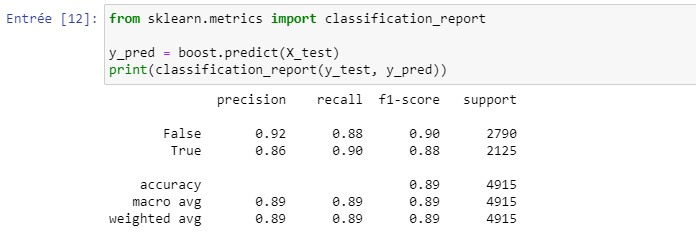


#### Tweaking params -  Useless (See HyperOpt below)

In [13]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.003
param['learning_rate'] = 0.1
param['max_depth'] = 12
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['reg_alpha']= 0.0001
param['seed'] = 0
param['base_score'] = 0.6

In [14]:
xgboost = XGBClassifier(**param)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.003,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0.0001,
              reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
from sklearn.metrics import classification_report

y_pred = xgboost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.88      0.90      2790
        True       0.85      0.90      0.88      2125

    accuracy                           0.89      4915
   macro avg       0.89      0.89      0.89      4915
weighted avg       0.89      0.89      0.89      4915



### plotting Xboost

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

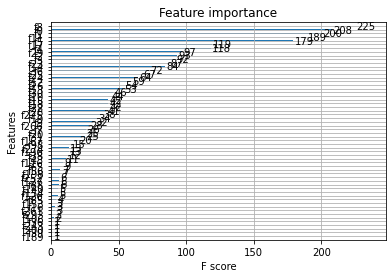

In [16]:
import xgboost as xgb

xgb.plot_importance(xgboost)

In [18]:
from xgboost import plot_tree

In [344]:
# plot_tree(boost)

## Decision Tree Classifier

In [396]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.87      0.87      2790
        True       0.84      0.83      0.83      2125

    accuracy                           0.86      4915
   macro avg       0.85      0.85      0.85      4915
weighted avg       0.86      0.86      0.86      4915



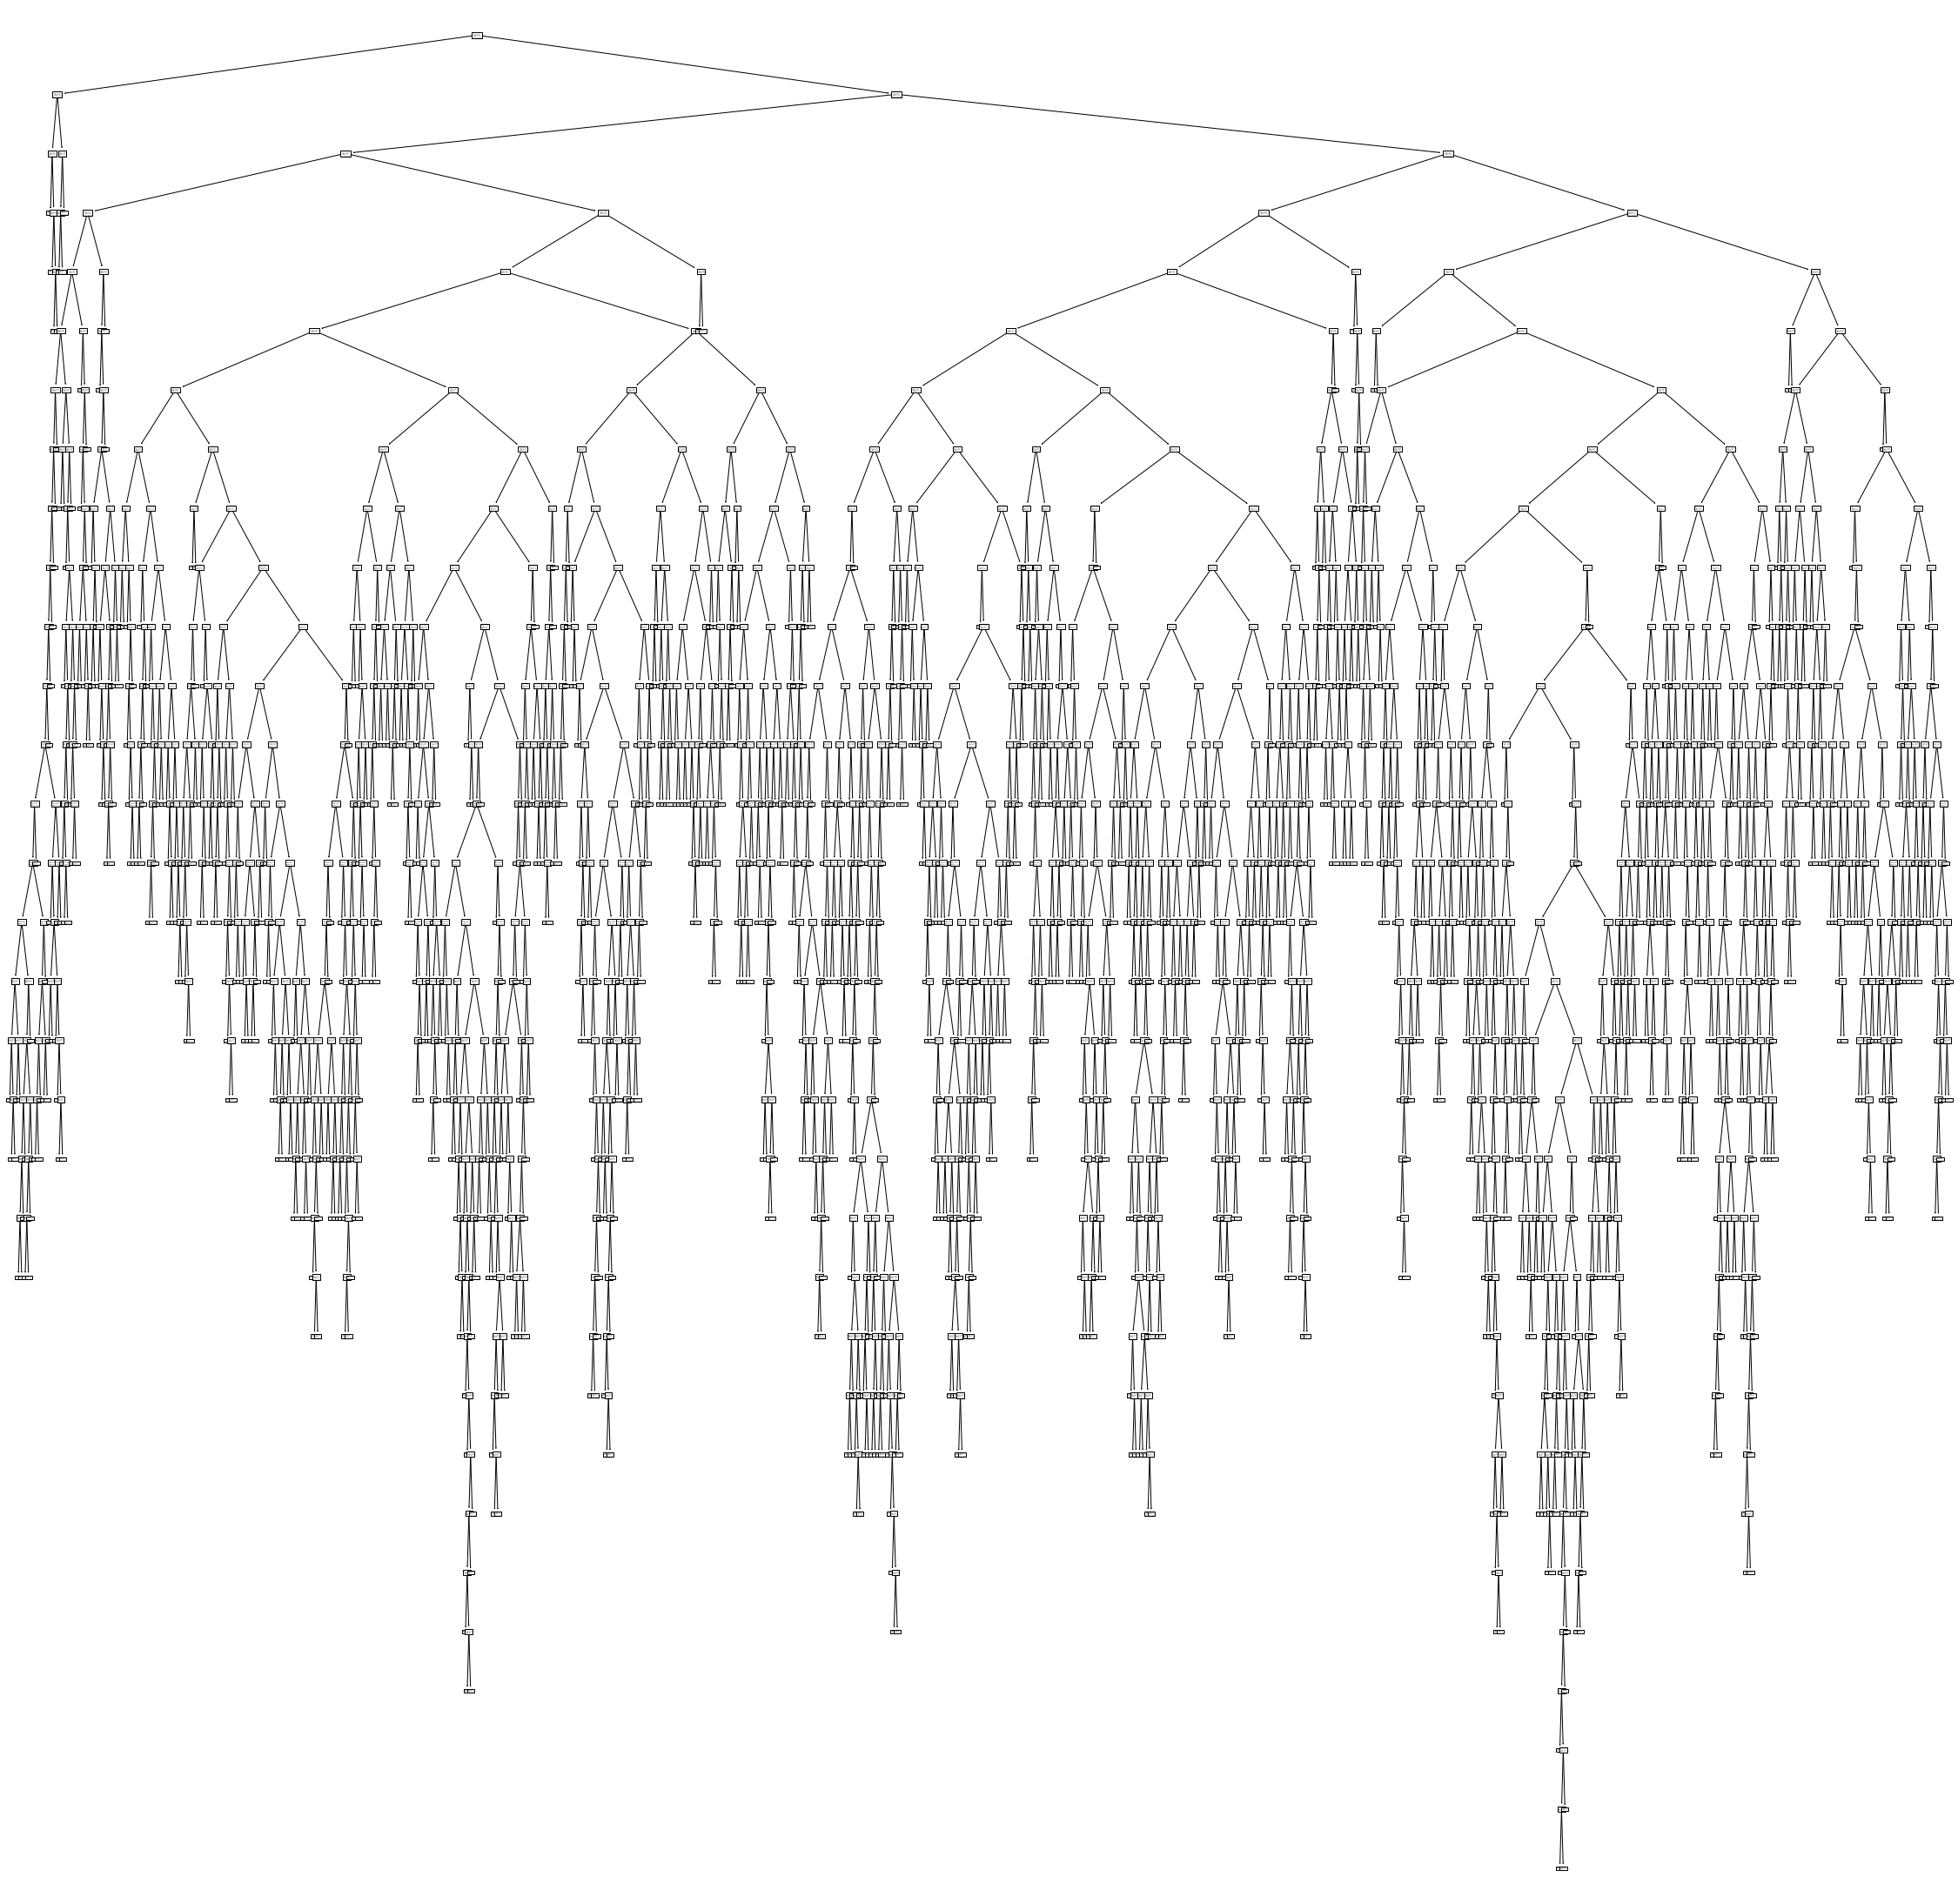

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40, 40))
plot_tree(tree)
plt.show()

## Support Vector Classifier

In [398]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [39]:
y_pred = svc_model.predict(X_test)
print('Support Vector Classifier report')
print(classification_report(y_test, y_pred))

Support Vector Classifier report
              precision    recall  f1-score   support

       False       0.88      0.80      0.84      2790
        True       0.76      0.85      0.81      2125

    accuracy                           0.82      4915
   macro avg       0.82      0.83      0.82      4915
weighted avg       0.83      0.82      0.82      4915



## Logistic Regression

In [401]:
log_model = LogisticRegression(max_iter = 500, class_weight = 'balanced', )
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [42]:
from sklearn.linear_model import LogisticRegression


y_pred = log_model.predict(X_test)
print('Logistic Regression report')
print(classification_report(y_test, y_pred))

Logistic Regression report
              precision    recall  f1-score   support

       False       0.89      0.74      0.81      2790
        True       0.72      0.88      0.79      2125

    accuracy                           0.80      4915
   macro avg       0.81      0.81      0.80      4915
weighted avg       0.82      0.80      0.80      4915



## Adaboost + Decision Tree


In [397]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier()
boosted = AdaBoostClassifier(tree)
boosted.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [48]:
y_pred = boosted.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89      2790
        True       0.86      0.86      0.86      2125

    accuracy                           0.88      4915
   macro avg       0.88      0.88      0.88      4915
weighted avg       0.88      0.88      0.88      4915



# Select Features

We 

In [15]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
 

def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(), max_features=18)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [71]:
#applying function to X
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [284]:
xgboost_fs = XGBClassifier()

In [285]:
xgboost_fs.fit(X_train_fs, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
y_pred = xgboost_fs.predict(X_test_fs)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82      2790
        True       0.76      0.79      0.77      2125

    accuracy                           0.80      4915
   macro avg       0.80      0.80      0.80      4915
weighted avg       0.80      0.80      0.80      4915



## checking features

Feature: 0, Score: 0.03180
Feature: 1, Score: 0.12276
Feature: 2, Score: 0.03180
Feature: 3, Score: 0.05122
Feature: 4, Score: 0.02991
Feature: 5, Score: 0.04165
Feature: 6, Score: 0.03509
Feature: 7, Score: 0.03186
Feature: 8, Score: 0.04029
Feature: 9, Score: 0.03787
Feature: 10, Score: 0.13596
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03811
Feature: 13, Score: 0.04955
Feature: 14, Score: 0.04056
Feature: 15, Score: 0.13374
Feature: 16, Score: 0.08437
Feature: 17, Score: 0.06345


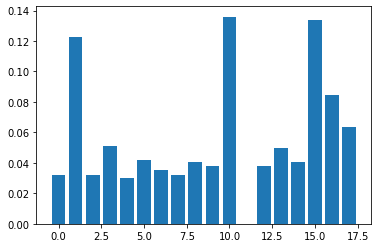

In [288]:
import matplotlib.pyplot as plt
importance = xgboost_fs.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [280]:
feature_selection =fs.get_support()

In [204]:
feature_selection

array([ True, False,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

### RFE 

In [170]:
# from sklearn.feature_selection import RFE
# from sklearn.pipeline import FeatureUnion, Pipeline


# numeric_transformer = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=2)),
#     ('scaler', MinMaxScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(drop= 'first', handle_unknown='error'))])

# # boolean_transformer = Pipeline(steps=[
# #     ('imputer', SimpleImputer(strategy='most_frequent'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, col_num),
#         ('cat', categorical_transformer, col_object)])

# # Append classifier to preprocessing pipeline.
# # Now we have a full prediction pipeline.

# feautre_selector = RFE(estimator=XGBClassifier(), n_features_to_select=20, step=1)

# clf = Pipeline(steps=[('features', FeatureUnion([('preprocessor', preprocessor)])), ('feature_selection', feautre_selector)])

In [171]:
# from sklearn.model_selection import train_test_split

# X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, y, test_size=0.3, random_state=42)

In [346]:
# X = df.drop('summit_success', axis=1)
# y = df.summit_success

# clf.fit(X_train_rfe, y_train_rfe)

In [347]:
# features_rfe = clf.named_steps['feature_selection'].support_


## Get feature names

This is the coluumn transformer used above.. we are going to extract the feature names out of it

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop= 'first', handle_unknown='error'))])

# boolean_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, col_num),
        ('cat', categorical_transformer, col_object)])

In [ ]:
preprocessor.fit_transform(X)

In [276]:
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin


def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

In [277]:
feature_names =  get_ct_feature_names(preprocessor)

In [278]:
def get_names(feature_selection, feature_names):
    list_features = []
    for i, name in enumerate(feature_names):
        if feature_selection[i]:
            list_features.append(name)
    return list_features

In [279]:
names =get_names(feature_selection, feature_names)

NameError: name 'feature_selection' is not defined

In [250]:
names

['summit_days',
 'camps',
 'tot_hired',
 'peak_height',
 'route1',
 'ascent1',
 'FeelsLikeC',
 'HeatIndexC',
 'winddirDegree',
 'windspeedKmph',
 'peak_id_AMAD',
 'peak_id_DHA1',
 'peak_id_HIML',
 'peak_id_KANG',
 'peak_id_MAKA',
 'peak_id_SHNW',
 'season_Spring',
 'status_H-A Worker']

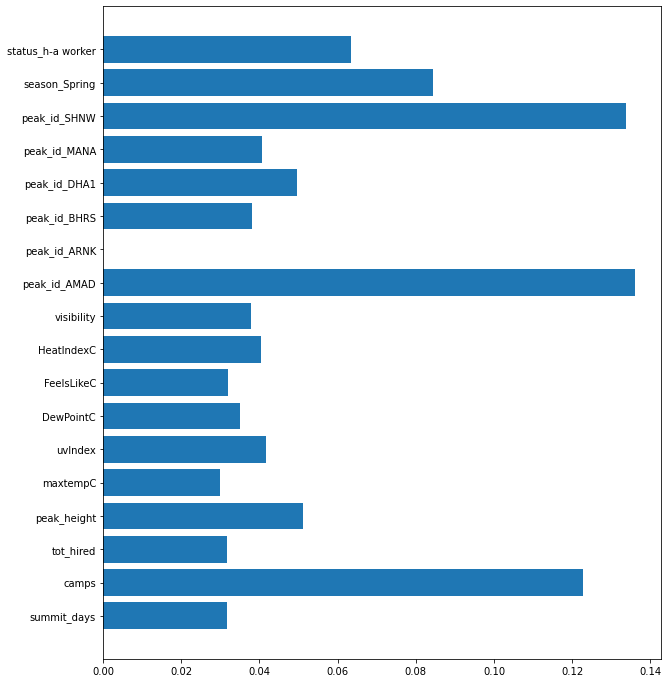

In [289]:
import seaborn as sns

importance = xgboost_fs.feature_importances_
# summarize feature importance

# plot feature importance
plt.figure(figsize=(10,12))
plt.barh(y=names, width=importance)
plt.show()

## Trying model without Route1 and Ascent1

In [21]:
for i, col in enumerate(col_num):
    if col == 'route1' or col == 'ascent1':
        col_num.pop(i)

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop= 'first', handle_unknown='error'))])

# boolean_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, col_num),
        ('cat', categorical_transformer, col_object)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [23]:
X_without = X.drop(['route1','ascent1'], axis=1)

In [24]:
X_trans_ok = clf.fit_transform(X_without)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans_ok, y, test_size=0.3, random_state=42)

In [26]:
from xgboost import XGBClassifier

boost_ok = XGBClassifier()
boost_ok.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
from sklearn.metrics import classification_report

y_pred = boost_ok.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      2790
        True       0.77      0.80      0.78      2125

    accuracy                           0.81      4915
   macro avg       0.81      0.81      0.81      4915
weighted avg       0.81      0.81      0.81      4915



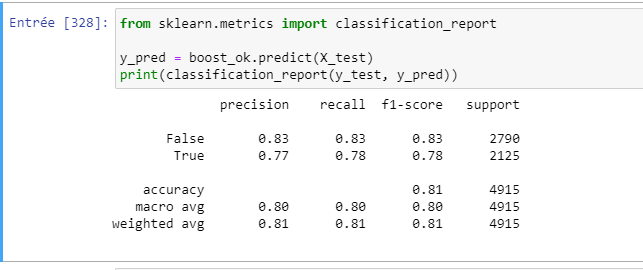


In [28]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [29]:
boost_ok = XGBClassifier()
boost_ok.fit(X_train_fs, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
y_pred = boost_ok.predict(X_test_fs)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82      2790
        True       0.76      0.79      0.77      2125

    accuracy                           0.80      4915
   macro avg       0.80      0.80      0.80      4915
weighted avg       0.80      0.80      0.80      4915



In [331]:
feature_names =  get_ct_feature_names(preprocessor)

In [281]:
names =get_names(feature_selection, feature_names)

In [283]:
import seaborn as sns

importance = xgboost_fs.feature_importances_
# summarize feature importance

# plot feature importance
plt.figure(figsize=(10,12))
plt.barh(y=names, width=importance)
plt.show()

NameError: name 'xgboost_fs' is not defined

In [339]:
names

['summit_days',
 'camps',
 'tot_hired',
 'peak_height',
 'age',
 'mintempC',
 'moon_illumination',
 'HeatIndexC',
 'WindChillC',
 'peak_id_AMOT',
 'peak_id_BEDG',
 'peak_id_CHRW',
 'peak_id_DING',
 'peak_id_HONG',
 'peak_id_MERR',
 'peak_id_YAKA',
 'season_Summer',
 'status_H-A Worker (Cook)']

In [340]:
columns_to_keep = ['peak_id', 
'status', 
'season', 
'peak_heigth',
'age', 
'mintempC',
 'moon_illumination',
 'HeatIndexC',
 'WindChillC',
 'summit_days',
 'camps',
 'tot_hired']

In [343]:
df[['status']].value_counts()

status             
Climber                8440
H-A Worker             4721
Leader                 2427
Deputy Leader           128
H-A Assistant            99
                       ... 
Climber/Film Crew         1
Climber/Exp Doctor        1
Climber/Cyclist           1
Climber/Coach             1
Co-Leader (Group B)       1
Length: 97, dtype: int64

In [334]:
X_without.columns

Index(['peak_id', 'host', 'summit_days', 'tot_days', 'camps', 'rope',
       'tot_members', 'tot_hired', 'no_hired', 'comrte', 'stdrte', 'primrte',
       'peak_height', 'season', 'sex_M', 'yob', 'status', 'leader', 'deputy',
       'bconly', 'nottobc', 'support', 'disabled', 'hired', 'sherpa',
       'tibetan', 'solo', 'traverse', 'ski', 'parapente', 'speed', 'o2_used',
       'o2_none', 'o2_climb', 'o2_descent', 'o2_sleep', 'o2_medical', 'age',
       'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [32]:
!pip install hyperopt

  Using cached hyperopt-0.2.5-py2.py3-none-any.whl (965 kB)
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
Processing c:\users\jerem\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0\future-0.18.2-py3-none-any.whl


## Hyperopt Optimization

In [48]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import warnings
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    
    classifier = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(X_train_fs, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = "f1")
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(2, 18, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.001, 0.2, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 400, 20)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1.0, 0.1)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            max_evals=200
            algo=tpe.suggest,
            trials=trials)

print("Best: ", best)


# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train_fs, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_fs, y = y_train, cv = 5, scoring = "f1")
CrossValMean = accuracies.mean()
print("Final CrossValMean: ", CrossValMean)

CrossValSTD = accuracies.std()

CrossValMean:                                          
0.7849485542097614                                     
CrossValMean:                                                                    
0.0                                                                              
CrossValMean:                                                                    
0.7393169834747724                                                               
CrossValMean:                                                                      
0.7821554174926459                                                                 
CrossValMean:                                                                      
0.7902041496434351                                                                 
CrossValMean:                                                                      
0.7298824362549503                                                                 
CrossValMean:                                           

KeyboardInterrupt: 

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_fs)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.84      0.77      2790
        True       0.72      0.53      0.61      2125

    accuracy                           0.71      4915
   macro avg       0.71      0.69      0.69      4915
weighted avg       0.71      0.71      0.70      4915



In [65]:
from sklearn.metrics import f1_score


0.7094608341810782

In [66]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import warnings
from sklearn.metrics import f1_score

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    
    classifier = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(X_train_fs, y_train)

    y_pred = classifier.predict(X_test_fs)
    
    score = f1_score(y_test, y_pred, average = 'micro')

    print("f1_score:", score)

    return{'loss':1-score, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(2, 18, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.001, 0.2, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 400, 20)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1.0, 0.1)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            max_evals=200,
            algo=tpe.suggest,
            trials=trials)

print("Best: ", best)


# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train_fs, y_train)
# # Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train_fs, y = y_train, cv = 5, scoring = "f1")
# CrossValMean = accuracies.mean()
# print("Final CrossValMean: ", CrossValMean)

# CrossValSTD = accuracies.std()

f1_score:                                              
0.7430315361139369                                     
f1_score:                                                                        
0.7977619532044761                                                               
f1_score:                                                                         
0.7979654120040692                                                                
f1_score:                                                                         
0.7344862665310274                                                                
f1_score:                                                                         
0.7635808748728382                                                                
f1_score:                                                                         
0.7979654120040692                                                                
f1_score:                                                   

f1_score:                                                                         
0.8004069175991861                                                                
f1_score:                                                                         
0.7178026449643947                                                                
f1_score:                                                                         
0.8004069175991861                                                                
f1_score:                                                                         
0.8038657171922685                                                                
f1_score:                                                                         
0.802441505595117                                                                 
f1_score:                                                                         
0.8006103763987792                                                                
f1_s

0.5676500508646999                                                                 
f1_score:                                                                          
0.795320447609359                                                                  
f1_score:                                                                          
0.8022380467955239                                                                 
f1_score:                                                                           
0.7993896236012208                                                                  
f1_score:                                                                           
0.8026449643947101                                                                  
f1_score:                                                                           
0.7924720244150559                                                                  
f1_score:                                                             

0.7896236012207529                                                                  
f1_score:                                                                           
0.8036622583926756                                                                  
f1_score:                                                                           
0.8056968463886063                                                                  
f1_score:                                                                           
0.8030518819938962                                                                  
f1_score:                                                                           
0.8038657171922685                                                                  
f1_score:                                                                           
0.7841302136317396                                                                  
f1_score:                                                        

0.7271617497456765                                                                  
f1_score:                                                                           
0.8052899287894202                                                                  
f1_score:                                                                           
0.7291963377416073                                                                  
f1_score:                                                                           
0.7997965412004069                                                                  
f1_score:                                                                           
0.8018311291963377                                                                  
f1_score:                                                                           
0.7332655137334689                                                                  
f1_score:                                                        

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=2.0, missing=nan, monotone_constraints='()',
              n_estimators=2, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred = classifier.predict(X_test_fs)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80      2790
        True       0.74      0.74      0.74      2125

    accuracy                           0.77      4915
   macro avg       0.77      0.77      0.77      4915
weighted avg       0.77      0.77      0.77      4915



In [511]:
best_model= XGBClassifier(n_estimators = 300,
                            max_depth = 18,
                            learning_rate = 0.3,
                            gamma = 0.8,
                            min_child_weight = 4,
                            colsample_bytree = 0.3
                            )

In [271]:
best_model.fit(X_train_fs, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
y_pred = best_model.predict(X_test_fs)

In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.83      0.83      2790
        True       0.78      0.78      0.78      2125

    accuracy                           0.81      4915
   macro avg       0.80      0.80      0.80      4915
weighted avg       0.81      0.81      0.81      4915



In [302]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



In [956]:
def modelfit(alg, X_train, X_test, y_train, y_test, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='auc')
        
    #Predict test set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_test, dtrain_predprob))
    print(f'F1 Score (Train) {f1_score(y_test, dtrain_predictions, average ="micro")}')
    
    feat_imp = pd.DataFrame()                
    imp = pd.Series(alg.feature_importances_)
    name = pd.Series(predictors)
    feat_imp['score'] = imp
    feat_imp['name'] = name
    plt.figure(figsize=(20,60))
    feat_imp.sort_values(by ='score', ascending=False).head(25).plot(x='name', y='score', kind='barh', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()


Model Report
Accuracy : 0.8069
AUC Score (Train): 0.894453
F1 Score (Train) 0.8069175991861649


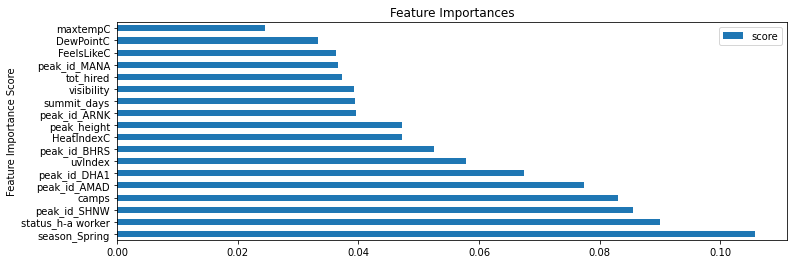

In [370]:
xgb1 = XGBClassifier(
 learning_rate =0.3,
 n_estimators=300,
 max_depth=18,
 min_child_weight=1,
 gamma=0.8,
 subsample=0.8,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, X_train_fs, X_test_fs, y_train, y_test, names)

# Final Model

In [893]:
best_model= XGBClassifier(n_estimators = 300,
                            max_depth = 18,
                            learning_rate = 0.3,
                            gamma = 0.8,
                            min_child_weight = 4,
                            colsample_bytree = 0.3
                            )

In [908]:
final_col_num = ['summit_days', 'tot_hired', 'peak_height', 'WindChillC', 'sex_M', 'camps', 'age', 'visibility', 'uvIndex', 'moon_illumination',
 'DewPointC', 'FeelsLikeC', 'HeatIndexC','totalSnow_cm', 'ratio_workers', 'o2_used', 'stability', 'tot_days', 'cumul_snow']

In [909]:
final_col_object = ['status', 'peak_id', 'season']

In [910]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop= 'first', handle_unknown='error'))])

# boolean_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, final_col_num),
        ('cat', categorical_transformer, final_col_object)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_final = df_snow[final_col_num + final_col_object]
y = df_snow.summit_success

X_trans_final = clf.fit_transform(X_final)

In [911]:
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_trans_final, y, test_size=0.3, random_state=42)

In [906]:
feature_names =  get_ct_feature_names(preprocessor)


Model Report
Accuracy : 0.8462
AUC Score (Train): 0.928535
F1 Score (Train) 0.8461851475076297


<Figure size 1440x4320 with 0 Axes>

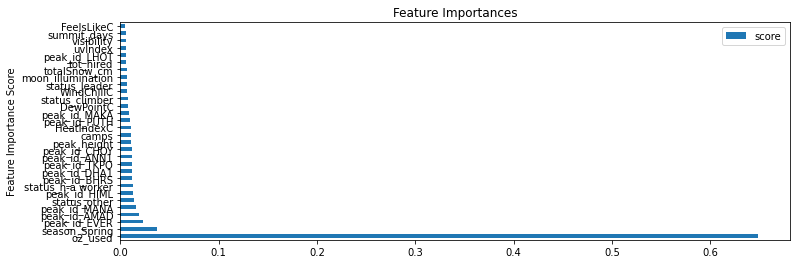

In [751]:
modelfit(best_model, X_train_final, X_test_final, y_train_final, y_test_final, feature_names)

Modèle avec cumul snow et total days 


Model Report
Accuracy : 0.8621
AUC Score (Train): 0.936652
F1 Score (Train) 0.862143891839691


<Figure size 1440x4320 with 0 Axes>

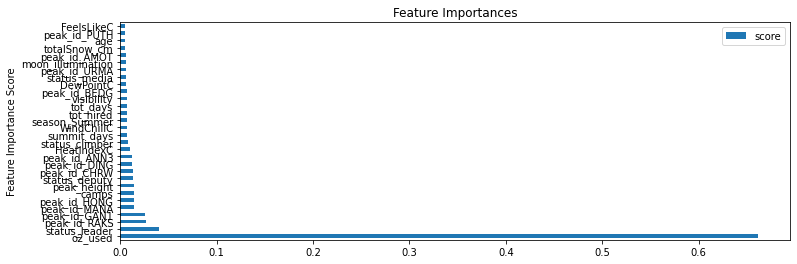

In [912]:
modelfit(best_model, X_train_final, X_test_final, y_train_final, y_test_final, feature_names)

In [957]:
best_of_best = XGBClassifier(n_estimators = 1000,
                            max_depth = 18,
                            learning_rate = 0.115,
                            gamma = 0.8,
                            min_child_weight = 4,
                            colsample_bytree = 0.3
                            )


Model Report
Accuracy : 0.8662
AUC Score (Train): 0.940990
F1 Score (Train) 0.8662481892805408


<Figure size 1440x4320 with 0 Axes>

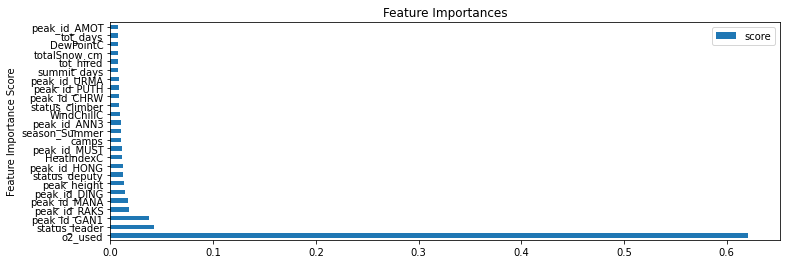

In [958]:
modelfit(best_of_best, X_train_final, X_test_final, y_train_final, y_test_final, feature_names)


Model Report
Accuracy : 0.8614
AUC Score (Train): 0.938951
F1 Score (Train) 0.8614196040560116


<Figure size 1440x4320 with 0 Axes>

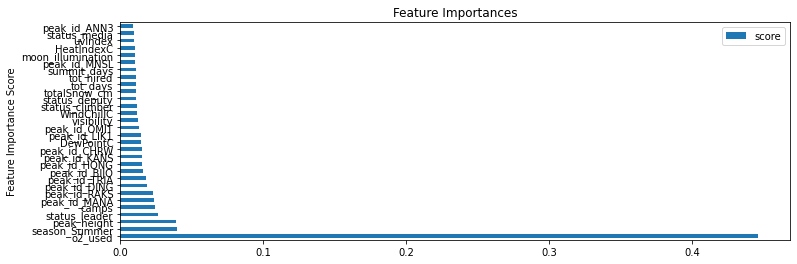

In [916]:
modelfit(dum_xgb, X_train_final, X_test_final, y_train_final, y_test_final, feature_names)

# Ensemble Methods tryouts (nothing conclusive)

In [495]:
from sklearn.ensemble import VotingClassifier
stacking_models = VotingClassifier([('xgb', best_model), ('adaboost', boosted), ('svc', svc_model), ('log', log_model)])

In [496]:
stacking_models.fit(X_train_final, y_train_final)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0.8,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.3, max_delta_step=0,
                                            max_depth=18, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=300, n_jobs=0,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                 

In [497]:
y_pred = stacking_models.predict(X_test_final)

In [498]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.87      0.83      2790
        True       0.80      0.69      0.74      2125

    accuracy                           0.79      4915
   macro avg       0.79      0.78      0.78      4915
weighted avg       0.79      0.79      0.79      4915



In [424]:
ada_xgb = AdaBoostClassifier(best_model)
ada_xgb.fit(X_train_final, y_train_final)

AdaBoostClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.3, gamma=0.8,
                                                gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=0.3,
                                                max_delta_step=None,
                                                max_depth=18,
                                                min_child_weight=4, missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=300, n_jobs=None,
                                                num_p

In [443]:
y_pred = ada_xgb.predict(X_test_final)

In [444]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.57      1.00      0.72      2790
        True       0.00      0.00      0.00      2125

    accuracy                           0.57      4915
   macro avg       0.28      0.50      0.36      4915
weighted avg       0.32      0.57      0.41      4915



In [485]:
best_model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [486]:
y_pred  =best_model.predict(X_test_final)

In [487]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.84      0.85      2790
        True       0.79      0.81      0.80      2125

    accuracy                           0.83      4915
   macro avg       0.82      0.82      0.82      4915
weighted avg       0.83      0.83      0.83      4915



In [434]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_final.toarray(), y_train_final)

GaussianNB()

In [447]:
y_pred=naive_bayes.predict(X_test_final.toarray())

In [448]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.09      0.17      2790
        True       0.45      0.99      0.62      2125

    accuracy                           0.48      4915
   macro avg       0.68      0.54      0.39      4915
weighted avg       0.71      0.48      0.36      4915



In [455]:
stacking_models = VotingClassifier([('xgb', best_model), ('adaboost', boosted), ('svc', svc_model),('naive', naive_bayes)])

In [456]:
stacking_models.fit(X_train_final.toarray(), y_train_final)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0.8,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.3, max_delta_step=0,
                                            max_depth=18, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=300, n_jobs=0,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                 

In [459]:
y_pred = stacking_models.predict(X_test_final.toarray())

In [460]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.83      0.82      2790
        True       0.77      0.75      0.76      2125

    accuracy                           0.79      4915
   macro avg       0.79      0.79      0.79      4915
weighted avg       0.79      0.79      0.79      4915



In [462]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight ='balanced', n_estimators=300 , max_depth=12)

In [463]:
forest.fit(X_train_final, y_train_final)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300)

In [467]:
y_pred = forest.predict(X_test_final)

In [468]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.79      0.80      2790
        True       0.74      0.77      0.75      2125

    accuracy                           0.78      4915
   macro avg       0.78      0.78      0.78      4915
weighted avg       0.78      0.78      0.78      4915



In [469]:
ada_forest = AdaBoostClassifier(best_model)
ada_forest.fit(X_train_final, y_train_final)

AdaBoostClassifier(base_estimator=XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.3, gamma=0.8,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.3,
                                                max_delta_step=0, max_depth=18,
                                                min_child_weight=4, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=300, n_jobs=0,
                                                num_parallel_tree=

In [472]:
y_pred = ada_forest.predict(X_test_final)

In [473]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.57      1.00      0.72      2790
        True       0.00      0.00      0.00      2125

    accuracy                           0.57      4915
   macro avg       0.28      0.50      0.36      4915
weighted avg       0.32      0.57      0.41      4915



In [491]:
stacking_models = VotingClassifier([('xgb', best_model),('naive', naive_bayes)])

In [492]:
stacking_models.fit(X_train_final.toarray(), y_train_final)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0.8,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.3, max_delta_step=0,
                                            max_depth=18, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=300, n_jobs=0,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                 

In [493]:
y_pred = stacking_models.predict(X_test_final.toarray())
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      2790
        True       0.79      0.79      0.79      2125

    accuracy                           0.82      4915
   macro avg       0.81      0.81      0.81      4915
weighted avg       0.82      0.82      0.82      4915



In [ ]:
best_model= XGBClassifier(n_estimators = 300,
                            max_depth = 18,
                            learning_rate = 0.3,
                            gamma = 0.8,
                            min_child_weight = 4,
                            colsample_bytree = 0.3
                            )
best_model.fit(X_train_final)

In [915]:
dum_xgb = XGBClassifier()

# Feature engeneering

* ratio sherpa personnes 
* experience du mec
* evolution des temperatures
* evolution totalsnow_cm
* rolling pressure 
* ratio success leader

## Sherpa Ratio

In [650]:
df_work = df.copy()

pour le modele snow

In [883]:
df_work = df_snow.copy()

In [884]:
def worker(x):
    if x == 'H-A Worker':
        return 1
    return 0
df_work.status= df_work.status.map(worker)
workers = df_work.groupby('exp_id', as_index=False).agg({'tot_members': 'count', 'status': np.sum })

In [885]:
workers['ratio_workers'] = workers.status / workers.tot_members

In [886]:
worker_full = workers.merge(df_work, on='exp_id', how = 'right')

In [887]:
worker_full['status'] = df.status
worker_full['tot_members_x'] = df.tot_members

In [888]:
worker_full.drop(['status_x', 'tot_members_x'], axis=1, inplace=True)

In [664]:
df['ratio_workers'] = worker_full.ratio_workers

In [889]:
df_snow['ratio_workers'] = worker_full.ratio_workers

## total snow

In [671]:
from weather import Weather
weather = Weather().get_data()
weather = Weather().clean_data(weather)


In [672]:
weather

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2010-01-01,-7,-18,0.0,8.7,2,100,2010-01-01 17:55:00,2010-01-01 07:09:00,2010-01-01 06:49:00,...,-23,44,3,67,0.0,1023,-7,10,180,23
1,2010-01-02,-2,-17,0.0,8.7,2,85,2010-01-02 19:07:00,2010-01-02 08:01:00,2010-01-02 06:49:00,...,-17,31,5,73,0.0,1023,-2,9,308,16
2,2010-01-03,-1,-13,0.0,8.7,2,77,2010-01-03 20:16:00,2010-01-03 08:45:00,2010-01-03 06:49:00,...,-14,25,3,68,0.0,1019,-1,10,278,14
3,2010-01-04,-3,-16,0.0,8.7,2,70,2010-01-04 21:23:00,2010-01-04 09:26:00,2010-01-04 06:50:00,...,-18,35,9,78,0.0,1015,-3,10,274,21
4,2010-01-05,-4,-21,0.0,8.7,2,63,2010-01-05 22:27:00,2010-01-05 10:02:00,2010-01-05 06:50:00,...,-19,25,10,78,0.0,1017,-4,7,269,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,2020-10-28,-8,-16,0.0,8.7,2,78,2020-10-28 15:49:00,2020-10-28 03:03:00,2020-10-28 06:06:00,...,-17,13,0,29,0.0,1018,-8,10,222,7
3954,2020-10-29,-8,-21,0.0,8.7,2,85,2020-10-29 16:18:00,2020-10-29 03:55:00,2020-10-29 06:07:00,...,-18,22,0,28,0.0,1020,-8,10,226,11
3955,2020-10-30,-7,-14,0.0,8.7,2,93,2020-10-30 16:48:00,2020-10-30 04:46:00,2020-10-30 06:07:00,...,-17,19,0,32,0.0,1020,-7,10,224,9
3956,2020-10-31,-8,-20,0.0,8.7,2,97,2020-10-31 17:19:00,2020-10-31 05:38:00,2020-10-31 06:08:00,...,-18,18,0,41,0.0,1020,-8,10,220,9


In [701]:
weather[weather['date_time'].between('2010-04-05 00:00:00', '2010-04-09 00:00:00')]['totalSnow_cm'].sum()

0.0

In [688]:
weather.loc[98]['date_time'] == df_snow.term_date[1]

True

In [807]:
df_snow = Data().get_match_table()

In [871]:
df_snow = df_snow.dropna(subset=['summit_date1', 'bc_date'])

In [876]:
df_snow['cumul_snow'] = 0

for index, row in df_snow.iterrows():
    date1 = row['bc_date']
    date2 = row['summit_date1']
#     acc_snow = weather.loc[date1:date2, 'totalSnow_cm'].sum()
    acc_snow = weather[weather['date_time'].between(date1,date2)]['totalSnow_cm'].sum()
    df_snow.loc[index, 'cumul_snow'] = acc_snow

In [873]:
# df_snow['snow_cumul'] = ''

# for i, row in df_snow.iterrows():
# #     df_snow.loc[i, 'snow_cumul'] =  weather[weather['date_time'].between(row['bc_date'], row['term_date'])]['totalSnow_cm'].sum()
#     print(row['bc_date'], row['term_date'])
    

In [781]:
df_snow[(df_snow['tot_days'] == 0) | (df_snow['summit_success']== True) ].groupby('peak_id').agg({'exp_id': 'count'}).sort_values(by='exp_id', ascending=False)


,exp_id
peak_id,
EVER,3502
AMAD,1583
CHOY,789
MANA,787
HIML,358
...,...
CHOP,1
OMIT,1
LDNG,1


In [809]:
mean_peaks_success = df_snow[(df_snow['tot_days'] > 0) & (df_snow['summit_success']== True) ].groupby('peak_id', as_index= False).agg({'exp_id': 'count', 'tot_days': np.mean}).sort_values(by='exp_id', ascending=False)

In [810]:
mean_peaks_success

,peak_id,exp_id,tot_days
22,EVER,2784,40.830101
0,AMAD,782,13.597187
50,MANA,629,24.468998
15,CHOY,550,24.843636
43,LHOT,196,38.239796
...,...,...,...
13,CHOB,1,3.000000
14,CHOP,1,5.000000
44,LIK1,1,15.000000
32,JAGD,1,8.000000


In [811]:
mean_peaks_fail = df_snow[(df_snow['tot_days'] > 0) & (df_snow['summit_success']== False) ].groupby('peak_id', as_index= False).agg({'exp_id': 'count', 'tot_days': np.mean}).sort_values(by='exp_id', ascending=False)

,peak_id,exp_id,tot_days
33,EVER,2075,31.346506
0,AMAD,933,12.254019
23,CHOY,779,25.820282
69,MANA,710,21.861972
12,BARU,353,11.308782
...,...,...,...
25,CHUB,1,6.000000
22,CHOP,1,5.000000
62,LIK1,1,15.000000
64,LMOC,1,2.000000


In [794]:
total_days = mean_peaks_success[mean_peaks_success['peak_id']== 'EVER'].tot_days.values[0]
total_days

35.049029221415964

In [830]:
df_snow[(df_snow['tot_days'] == 0) & (df_snow['summit_success']== True) ].groupby('peak_id').agg({'exp_id': 'count'}).sort_values(by='exp_id', ascending=False)

,exp_id
peak_id,
ACHN,11
SISN,8
DRAG,7
DZA2,6
CHAK,5
LUN2,4
DOMO,3
DOMK,2
GDNG,2


In [820]:
list_peaks = mean_peaks_success.peak_id.to_list()
list_fails =mean_peaks_fail.peak_id.to_list()

In [839]:
for i, row in df_snow.iterrows():
    if row['tot_days'] == 0:
        if row['summit_success'] == True:
            peak = row['peak_id']
            if peak in list_peaks:
                total_days = mean_peaks_success[mean_peaks_success['peak_id']== peak].tot_days.values[0]
                df_snow.loc[i, 'tot_days'] = total_days

        if row['summit_success'] == False:
            peak = row['peak_id']
            if peak in list_fails:
                total_days = mean_peaks_fail[mean_peaks_fail['peak_id']== row['peak_id']].tot_days.values[0]
                total_days = total_days - np.random.randint(1,10)
                df_snow.loc[i, 'tot_days'] = total_days

In [841]:
df['tot_days_reworked'] = df_snow.tot_days

In [863]:
df_snow.bc_date.isnull().sum()

2409

## rolling pressure

In [739]:
df['rolling_pressure_past'] = df['pressure'].rolling(window=3).mean()
df['rolling_pressure_futur'] = df['pressure'].shift(-2).rolling(window=3).mean()
df['stability'] = df['rolling_pressure_futur'] - df['rolling_pressure_past']

In [890]:
df_snow['rolling_pressure_past'] = df_snow['pressure'].rolling(window=3).mean()
df_snow['rolling_pressure_futur'] = df_snow['pressure'].shift(-2).rolling(window=3).mean()
df_snow['stability'] = df_snow['rolling_pressure_futur'] - df_snow['rolling_pressure_past']

In [914]:
df[['summit_success']].value_counts()[0]

summit_success
False             9367
dtype: int64